In [62]:
! cta-data get cta/users/gitlab_ctao_volodymyr_savchenko//reports --recursive

import glob

INFO:ctadata.api:full url: https://platform.cta.cscs.ch/services/downloadservice/list/cta/users/gitlab_ctao_volodymyr_savchenko//reports
INFO:ctadata.api:fetching dir cta/users/gitlab_ctao_volodymyr_savchenko/reports/
INFO:ctadata.api:full url: https://platform.cta.cscs.ch/services/downloadservice/list/cta/users/gitlab_ctao_volodymyr_savchenko/reports
INFO:ctadata.api:fetching file cta/users/gitlab_ctao_volodymyr_savchenko/reports/1_2_c.json
INFO:ctadata.api:full url: https://platform.cta.cscs.ch/services/downloadservice/list/cta/users/gitlab_ctao_volodymyr_savchenko/reports/1_2_c.json
INFO:ctadata.api:full url: https://platform.cta.cscs.ch/services/downloadservice/fetch/cta/users/gitlab_ctao_volodymyr_savchenko/reports/1_2_c.json
INFO:ctadata.api:got response <Response [200]>
INFO:ctadata.api:fetching file cta/users/gitlab_ctao_volodymyr_savchenko/reports/1_2_np.json
INFO:ctadata.api:full url: https://platform.cta.cscs.ch/services/downloadservice/list/cta/users/gitlab_ctao_volodymyr_s

In [65]:
import json
import pandas as pd

d = []
for j in glob.glob('cta/users/gitlab_ctao_volodymyr_savchenko/reports/noir2/*.json'):
    d.append(json.load(open(j)))

d = pd.DataFrame(d)
d.sort_values('nproc', inplace=True)

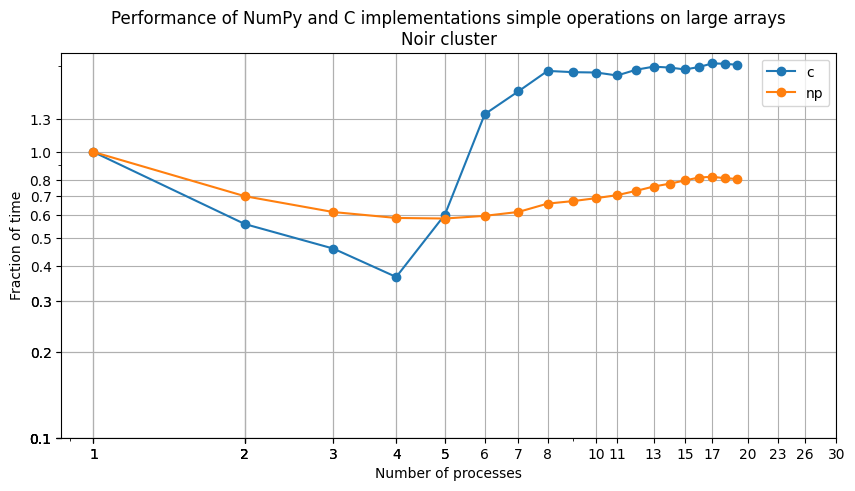

In [67]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

for version in ['c', 'np']:
    _d = d[d.version == version]
    plt.plot(
        _d.nproc,
        _d.total_time / _d.total_time[_d.nproc == 1].values[0],
        label=version,
        marker='o'
    )

plt.legend()

plt.grid()

plt.loglog()


xticks = np.round(np.logspace(0, np.log10(30), 25)).astype(int)
plt.gca().set_xticks(xticks)
_ = plt.gca().set_xticklabels(xticks)

yticks = np.round(np.logspace(-1.1, 0.1, 15), 1)
plt.gca().set_yticks(yticks)
_ = plt.gca().set_yticklabels(yticks)


# plt.ylim(0.09, 1.2)


plt.xlabel('Number of processes')
plt.ylabel('Fraction of time')

plt.title('Performance of NumPy and C implementations simple operations on large arrays\nNoir cluster')

plt.savefig('noir.png', dpi=300)